<a href="https://colab.research.google.com/github/Byfroggy/AIpython/blob/main/250530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
species_group_mean=iris.groupby('species').mean()
species_group_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [25]:
#기본정보
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
#결측치 확인
print(pd.isna(iris).sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [33]:
#중복데이터 확인
print('중복 제거 전 데이터프레임 크기',iris.shape)
duplicate_rows = iris[iris.duplicated(keep=False)]
print('완전 중복 행 개수:', len(duplicate_rows))
print(duplicate_rows)
#제거
iris_cleaned = iris.drop_duplicates()
print('중복 제거 후 데이터프레임 크기', iris_cleaned.shape)
print('제거된 행 수:',len(duplicate_rows)//2)
print(iris_cleaned)

중복 제거 전 데이터프레임 크기 (150, 5)
완전 중복 행 개수: 2
     sepal_length  sepal_width  petal_length  petal_width    species
101           5.8          2.7           5.1          1.9  virginica
142           5.8          2.7           5.1          1.9  virginica
중복 제거 후 데이터프레임 크기 (149, 5)
제거된 행 수: 1
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2       

In [35]:
#이상치 데이터 확인(사분위수)
Q1 = iris.drop('species', axis=1).quantile(0.25)
Q3 = iris.drop('species', axis=1).quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


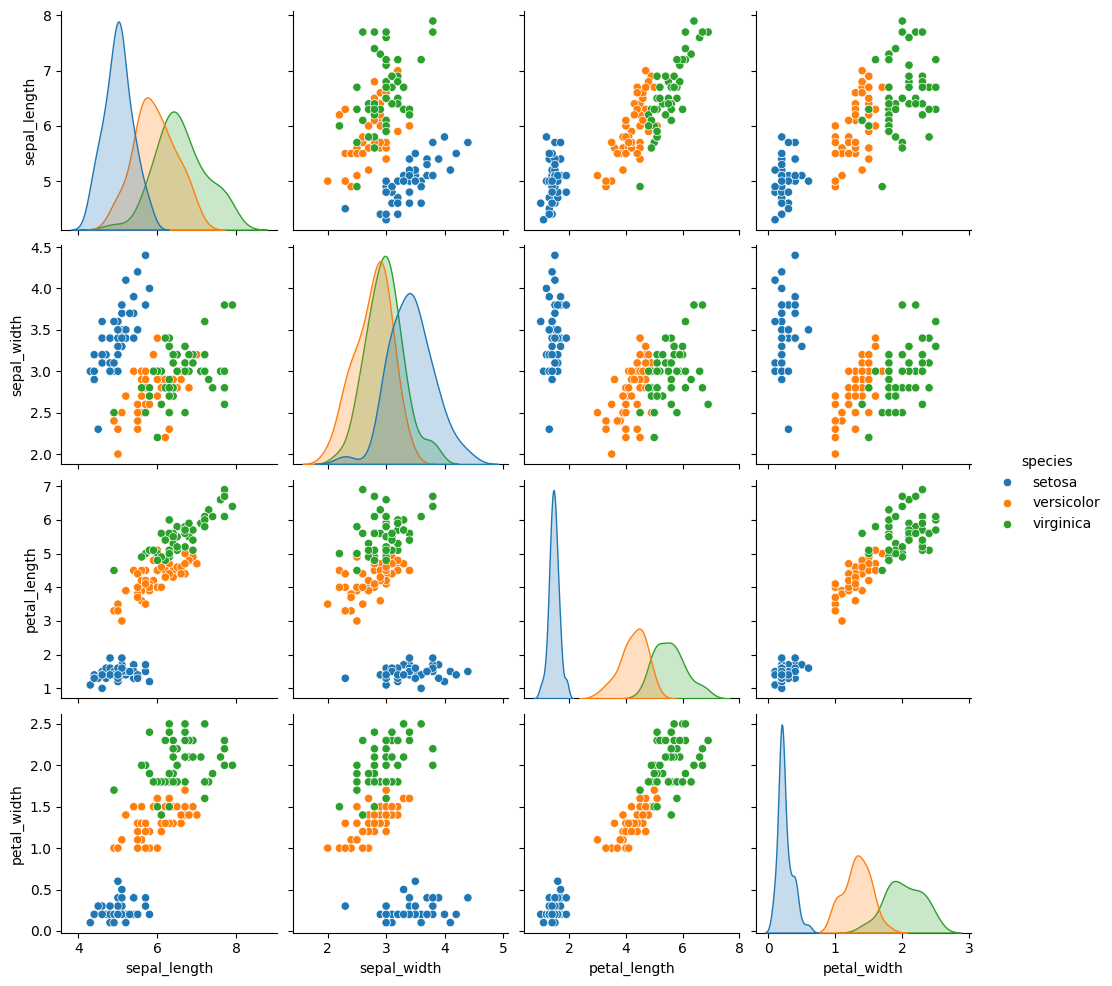

In [36]:
sns.pairplot(iris, hue='species')

In [37]:
data = iris[['sepal_length', 'sepal_width', 'petal_length','petal_width']].to_numpy()
target=iris['species'].to_numpy()

In [14]:
train_input, test_input, train_target, test_target= train_test_split(data, target, test_size = 0.2)
print(f"훈련 데이터 개수: {len(train_input)}")
print(f"시험 데이터 개수: {len(test_input)}")

훈련 데이터 개수: 120
시험 데이터 개수: 30


In [15]:
dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
dt.score(test_input, test_target)
my_data = [5.1, 3.4, 1.5, 0.3]
pred = dt.predict([my_data])
print(f"{my_data} 데이터는 {pred[0]} 라는 꽃입니다.")
print(f"{my_data} 데이터는 {pred[0]}라는 꽃입니다.")

[5.1, 3.4, 1.5, 0.3] 데이터는 setosa 라는 꽃입니다.
[5.1, 3.4, 1.5, 0.3] 데이터는 setosa라는 꽃입니다.


In [18]:
y_pred=dt.predict(test_input)

In [23]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")


모델 정확도: 0.5306


In [16]:
tips = sns.load_dataset('tips')
tips
data = tips[['total_bill', 'tip']].to_numpy()
target=tips['size'].to_numpy()
train_input, test_input, train_target, test_target= train_test_split(data, target, test_size = 0.2)
dt = DecisionTreeRegressor()
dt.fit(train_input, train_target)
dt.score(test_input, test_target)

-0.435471100554236

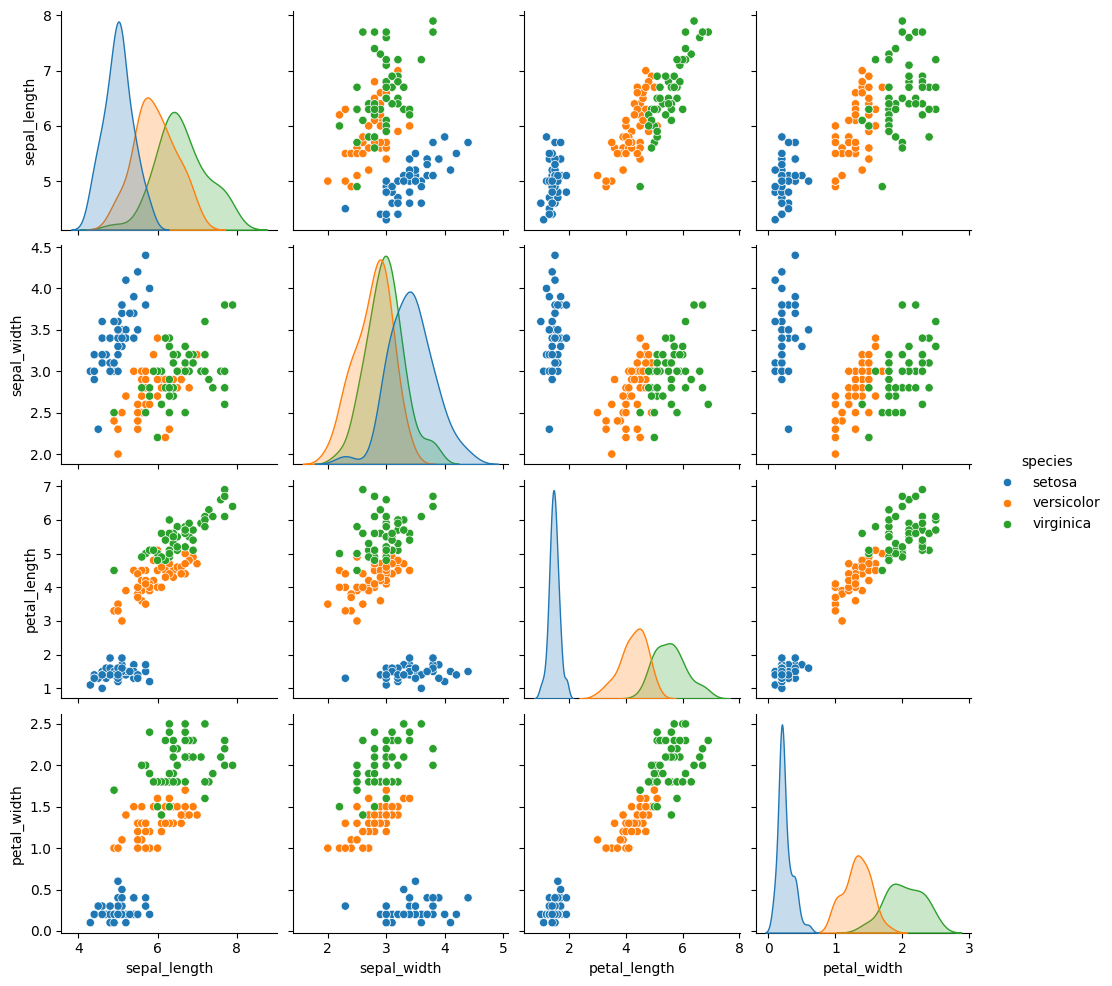

In [38]:
sns.pairplot(iris_cleaned, hue='species')